# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Откройте файлы и изучите их

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import seaborn as sns
sns.set(rc={'figure.figsize':(15,7)})
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import make_scorer
import re
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

Прочитаем файлы в датафреймы

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

Посмотрим общую информацию о файлах и первые строки

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [5]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [6]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [7]:
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [8]:
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


В датафрейме с тестовыми данными 53 столбца, в обучающем и общем по 87  
Также во всех датафреймах столбец date имеет тип object, необходимо преобразовать

### Проверьте, что эффективность обогащения рассчитана правильно
* Вычислите её на обучающей выборке для признака rougher.output.recovery
* Найдите MAE между вашими расчётами и значением признака
* Опишите выводы

Эффективность обогащения рассчитывается по формуле
$$
\\Recovery = \frac{C*(F-T)}{F*(C-T)}*100\% 
$$

Где:
* C — доля золота в концентрате после флотации/очистки;
* F — доля золота в сырье/концентрате до флотации/очистки;
* T — доля золота в отвальных хвостах после флотации/очистки.

Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.

Определим функцию, производяющую эти вычисления

In [9]:
def get_recovery(C, F, T):
    return 100 * (C*(F-T)) / (F*(C-T))

Определим столбцы, содержащие необходимые значения:
* Recovery - rougher.output.recovery
* C - rougher.output.concentrate_au
* F - rougher.input.feed_au
* T - rougher.output.tail_au

Для расчета значений и нахождения MAE сформируем отдельный датафрейм без NaN-значений

In [10]:
df_recovery = df_train[
    ['rougher.output.concentrate_au', 'rougher.input.feed_au', 
     'rougher.output.tail_au', 'rougher.output.recovery']].dropna(axis = 0)

In [11]:
df_recovery.head()

,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au,rougher.output.recovery
0,19.793808,6.486150,1.170244,87.107763
1,20.050975,6.478583,1.184827,86.843261
2,19.737170,6.362222,1.162562,86.842308
3,19.320810,6.118189,1.079755,87.226430
4,19.216101,5.663707,1.012642,86.688794


In [12]:
df_recovery['rougher.calculated.recovery'] = get_recovery(C = df_recovery['rougher.output.concentrate_au'],
                                                           F = df_recovery['rougher.input.feed_au'],
                                                           T = df_recovery['rougher.output.tail_au'])

In [13]:
df_recovery.head()

,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au,rougher.output.recovery,rougher.calculated.recovery
0,19.793808,6.486150,1.170244,87.107763,87.107763
1,20.050975,6.478583,1.184827,86.843261,86.843261
2,19.737170,6.362222,1.162562,86.842308,86.842308
3,19.320810,6.118189,1.079755,87.226430,87.226430
4,19.216101,5.663707,1.012642,86.688794,86.688794


In [14]:
mean_absolute_error(df_recovery['rougher.output.recovery'], df_recovery['rougher.calculated.recovery'])

1.1131451184435918e-14

Вычисленное значение MAE крайне мало, также при просмотре первых строк полное совпадение до 6 знака после запятой, следовательно, эффективность обогащения рассчитана верно

### Проанализируйте признаки, недоступные в тестовой выборке
Что это за параметры? К какому типу относятся?

Получим и проанализируем список столбцов, доступных и в тестовой, и в обучающей выборке, а также их количество

In [15]:
len(df_train.columns.intersection(df_test.columns))

53

In [16]:
len(df_test.columns)

53

Количество совпадает, следовательно, дополнительных столбцов в тестовой выборке нет

In [17]:
list(df_train.columns.intersection(df_test.columns))

['date',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air'

Получим список столбцов, недоступных в тестовой выборке

In [18]:
list(df_train.columns.difference(df_test.columns))

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Общие признаки двух выборок:
* date - дата
* primary_cleaner.input* - первичная очистка, параметры сырья
* primary_cleaner.state* - первичная очистка, параметры, характеризующие текущее состояние этапа
* rougher.input* - флотация, параметры сырья
* secondary_cleaner.state* - вторичная очистка, параметры, характеризующие текущее состояние этапа

Признаки, отсутствующие в тестовой выборке
* final.output* - финальные характеристики, параметры продукта
* primary_cleaner.output* - первичная очистка, параметры продукта
* rougher.calculation* - флотация, расчётные характеристики
* rougher.output* - флотация, параметры продукта
* secondary_cleaner.output* - вторичная очистка, параметры продукта

Эти данные недоступны в начале технического процесса и становятся известны позднее  
При этом столбцы final.output.recovery и rougher.output.recovery являются целевыми, следовательно, их нужно как-то скопировать в тестовую выборку

### Проведите предобработку данных

Преобразуем столбцы date в тип datetime

In [19]:
DATE = '%Y-%m-%d %H:%M:%S'
df_train['date'] = pd.to_datetime(df_train['date'], format=DATE)
df_test['date'] = pd.to_datetime(df_test['date'], format=DATE)
df_full['date'] = pd.to_datetime(df_full['date'], format=DATE)

Проверим данные на дубликаты

In [20]:
df_train.duplicated().sum()

0

In [21]:
df_test.duplicated().sum()

0

In [22]:
df_full.duplicated().sum()

0

Проверим уникальность столбца date и наличие пропусков

In [23]:
def get_duplicated_sum(column):
    return column.duplicated().sum()

In [24]:
print(get_duplicated_sum(df_train['date']), get_duplicated_sum(df_test['date']), get_duplicated_sum(df_full['date']))

0 0 0


In [25]:
def get_nan_sum(column):
    return column.isna().sum()

In [26]:
print(get_nan_sum(df_train['date']), get_nan_sum(df_test['date']), get_nan_sum(df_full['date']))

0 0 0


Значения уникальны и не имеют пропусков, следовательно, столбец можно назначить индексом

In [27]:
df_train = df_train.set_index('date')
df_test = df_test.set_index('date')
df_full = df_full.set_index('date')

Посмотрим размер выборок и соотношение

In [28]:
df_train.shape[0]

14149

In [29]:
df_test.shape[0]

5290

In [30]:
df_full.shape[0]

19439

In [31]:
df_train.shape[0] / df_full.shape[0]

0.7278666598076032

In [32]:
df_test.shape[0] / df_full.shape[0]

0.2721333401923967

Соотношение не 3:1, но близко к тому

Посмотрим, какое количество данных (в процентах) мы потеряем, если удалим все пропуски

In [33]:
100 * (1 - df_train.dropna().shape[0] / df_train.shape[0])

22.135839988691785

In [34]:
100 * (1 - df_test.dropna().shape[0] / df_test.shape[0])

1.153119092627597

In [35]:
100 * (1 - df_full.dropna().shape[0] / df_full.shape[0])

17.207675291938884

В обучающей выборке 22%, при этом в тестовой всего чуть больше 1%  
Возможно, пропуски в тех стобцах, которых нет в тестовой выборке

Сохраним исходную выборку и сформируем новую, удалив пропуски (т.к. нет возможности их восстановить)

In [36]:
df_train_original = df_train.copy()

In [37]:
df_train.dropna(inplace=True)

In [38]:
df_test.dropna(inplace=True)

Посмотрим новые размеры выборок и их соотношение

In [39]:
df_train.shape[0]

11017

In [40]:
df_test.shape[0]

5229

In [41]:
df_train.shape[0] / (df_train.shape[0] + df_test.shape[0])

0.678136156592392

In [42]:
df_test.shape[0] / (df_train.shape[0] + df_test.shape[0])

0.32186384340760804

## Анализ данных

### Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки
Опишите выводы

Сформируем списки стадий и металлов

In [49]:
STAGES = ['rougher.input.feed', 'rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']

METALS = ['au', 'pb', 'ag']

Сделаем функцию, выводящую гистограмму на экран

In [50]:
def display_hist(df, metal):
    df.plot.hist(bins=100, alpha=0.5)
    plt.title(f'Суммарная концентрация {metal} на разных стадиях')
    plt.legend(['Сырье', 'Черновой концентрат', 'Первичная очистка', 'Финальный концентрат'])
    plt.show()

Выведем гистограммы концентрации вещества по стадиям для каждого металла

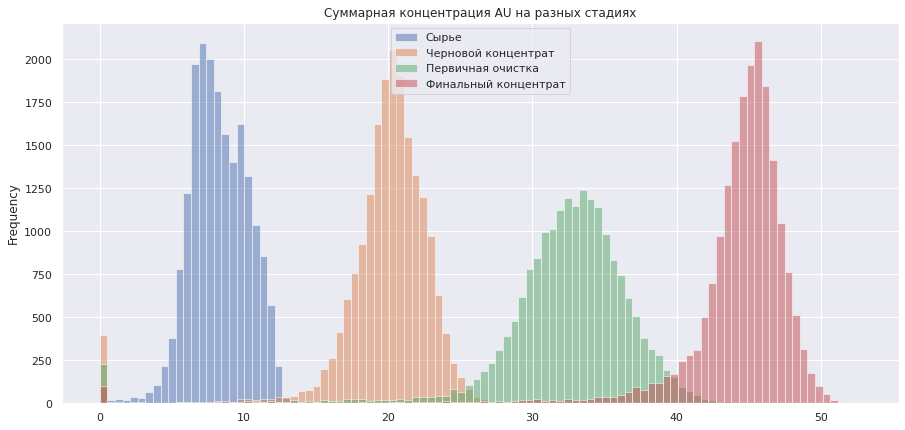

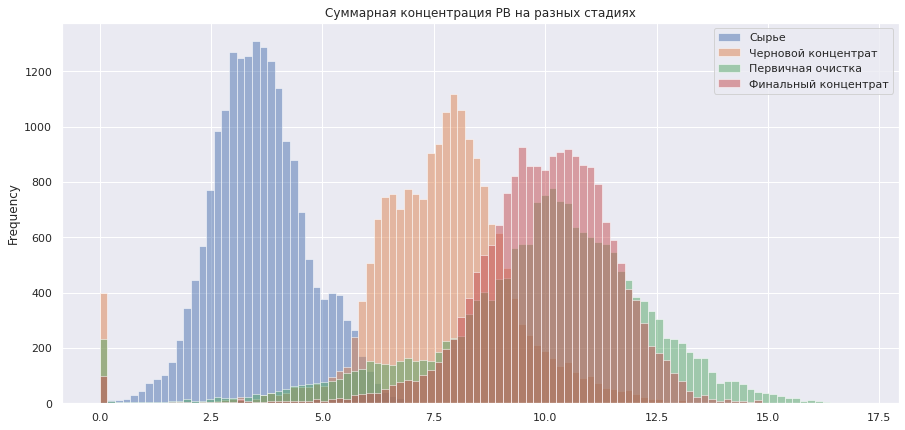

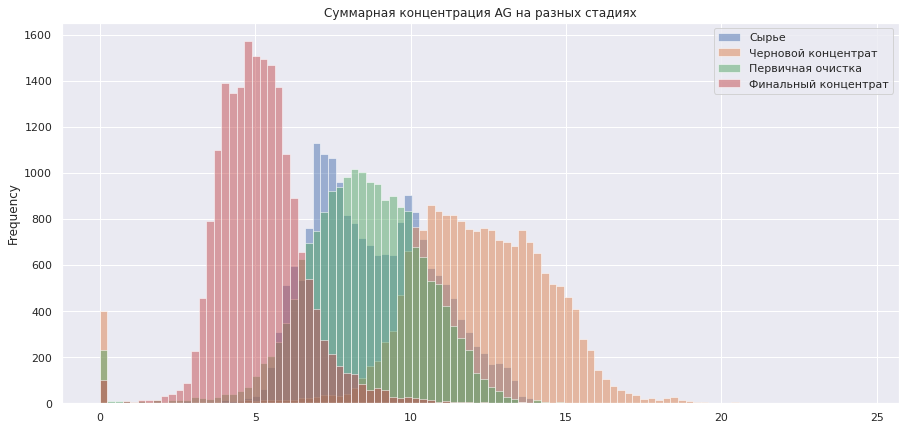

In [51]:
for metal in METALS:
    columns = []
    for stage in STAGES:
        columns.append(stage+'_'+metal)
        
    display_hist(df_full[columns], metal.upper())

### Сравните распределения размеров гранул сырья на обучающей и тестовой выборках
Если распределения сильно отличаются друг от друга, оценка модели будет неправильной

Размер гранул сырья хранится в столбце rougher.input.feed_size

Сформируем датафрейм из этих столбцов в обучающей и тестовой выборке

In [52]:
sizes = pd.concat([df_train['rougher.input.feed_size'].dropna(), df_test['rougher.input.feed_size'].dropna()], axis = 1)
sizes.columns = ['train', 'test']

In [53]:
sizes.describe()

,train,test
count,11017.000000,5229.000000
mean,57.215128,55.863978
std,18.913146,18.914656
min,9.659576,0.046369
25%,48.397242,43.911874
50%,53.843359,50.772729
75%,61.461770,62.265394
max,484.967466,392.494040


Построим график ядерной оценки плотности (KDE - Kernel Density Estimation)

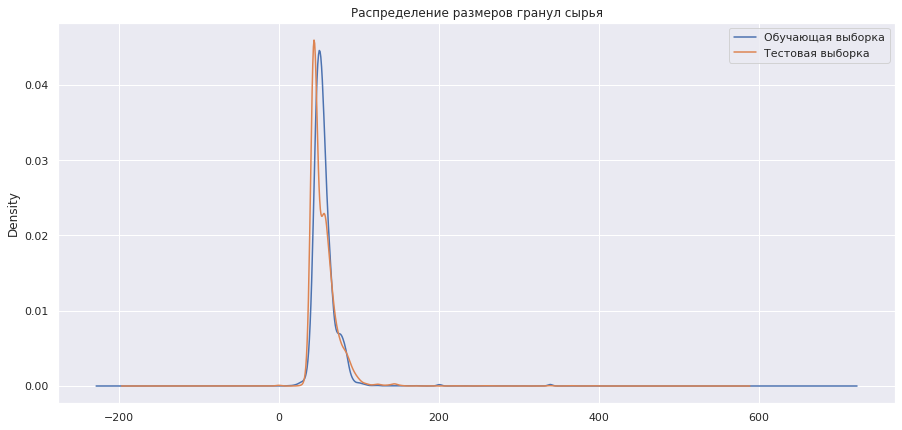

In [54]:
sizes.plot.kde()
plt.title('Распределение размеров гранул сырья')
plt.legend(['Обучающая выборка', 'Тестовая выборка'])
plt.show() 

По графику видно, что распределения близки друг к другу, следовательно, размеры гранул на обучающей и тестовой выборках отличаются несущественно

### Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах
Заметили аномальные значения в суммарном распределении или нет?
Если они есть, стоит ли их удалять из обеих выборок?
Опишите выводы и удалите аномалии.

Определим списки стадий и веществ

In [55]:
stages = ['rougher.input.feed', 'rougher.output.concentrate', 'final.output.concentrate']

agent = ['au', 'pb', 'sol', 'ag']

Определим функцию, возвращающую список столбцов для каждой стадии

In [56]:
def get_column_list(stage, agent):
    return list(map(lambda item: stage + '_' + item, agent))

Сформируем датафрейм с суммами для каждой стадии

In [57]:
def get_agent_sum(df_train):
    agent_sum = pd.DataFrame()

    for stage in stages:
        agent_sum[stage] = df_train[get_column_list(stage, agent)].sum(axis=1)
    return agent_sum

In [58]:
agent_sum = get_agent_sum(df_train)
agent_sum.head()

,rougher.input.feed,rougher.output.concentrate,final.output.concentrate
date,,,
2016-01-15 00:00:00,51.680034,66.424950,63.644396
2016-01-15 01:00:00,50.659114,67.012710,63.957723
2016-01-15 02:00:00,50.609929,66.103793,64.311180
2016-01-15 03:00:00,51.061546,65.752751,63.573449
2016-01-15 04:00:00,47.859163,65.908382,64.004667


Посмотрим описательные статистики

In [59]:
agent_sum.describe()

,rougher.input.feed,rougher.output.concentrate,final.output.concentrate
count,11017.000000,11017.000000,11017.000000
mean,56.991456,67.898765,69.061226
std,6.545997,12.244650,5.992066
min,0.040000,0.000000,0.000000
25%,53.284545,65.471243,67.910682
50%,57.208141,69.701409,69.460715
75%,61.395474,73.921804,71.310493
max,72.492216,87.273435,80.210644


Построим графики - гистограмму и диаграмму "ящик с усами"

In [60]:
def display_hist(agent_sum):
    agent_sum.plot.hist(bins=100, alpha=0.6)
    plt.title('Суммарная концентрация всех веществ на разных стадиях')
    plt.legend(['Сырье', 'Черновой концентрат', 'Финальный концентрат'])
    plt.show() 

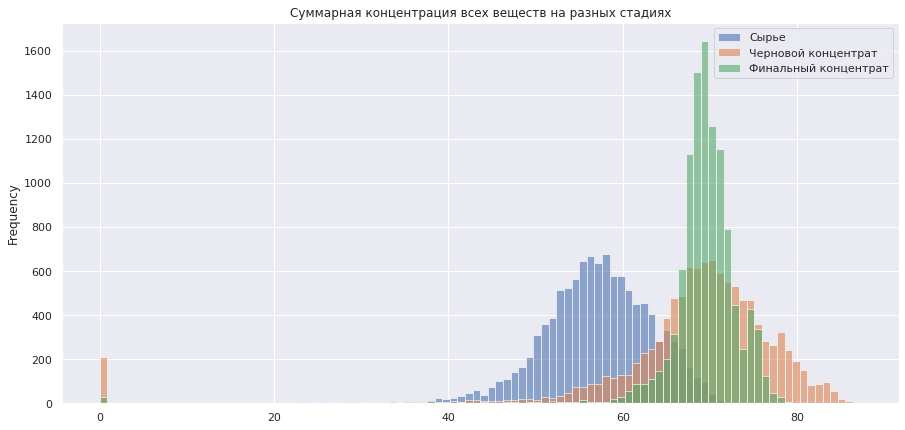

In [61]:
display_hist(agent_sum)

In [62]:
def display_boxplot(agent_sum):
    sns.boxplot(data= agent_sum)
    plt.title('Суммарная концентрация всех веществ на разных стадиях')
    plt.show() 

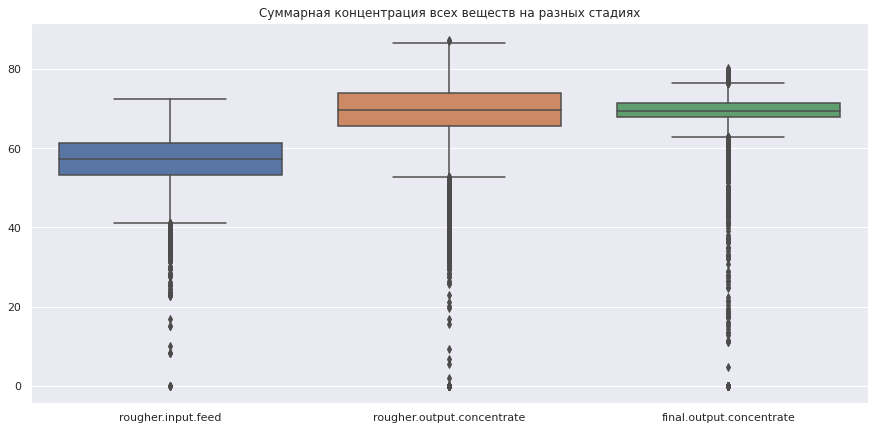

In [63]:
display_boxplot(agent_sum)

Около нуля наблюдается большое количество выбросов (при этом это не NaN, мы их удалили), и в целом много выбросов  
Попробуем от них избавиться

Опишем функцию (фильтр Хампеля), которая заменяет на NaN все значения, у которых разница с медианой больше, чем пять медианных абсолютных отклонений (std)

In [64]:
def hampel(vals_orig):
    vals = vals_orig.copy()    
    difference = np.abs(vals.median()-vals)
    median_abs_deviation = difference.median()
    threshold = 5 * median_abs_deviation
    outlier_idx = difference > threshold
    vals[outlier_idx] = np.nan
    return(vals)

Применим функцию к обучающей выборке

In [65]:
for stage in stages:
    column = get_column_list(stage, agent)
    df_train[column] = hampel(df_train[column])

In [66]:
df_train.isna().sum().sort_values(ascending=False)

rougher.output.concentrate_sol                        399
final.output.concentrate_au                           397
rougher.output.concentrate_au                         346
rougher.output.concentrate_pb                         280
rougher.output.concentrate_ag                         237
                                                     ... 
rougher.calculation.au_pb_ratio                         0
rougher.calculation.floatbank11_sulfate_to_au_feed      0
rougher.calculation.floatbank10_sulfate_to_au_feed      0
rougher.calculation.sulfate_to_au_concentrate           0
secondary_cleaner.state.floatbank6_a_level              0
Length: 86, dtype: int64

Удалим из выборки полученные пропуски

In [67]:
df_train.dropna(inplace=True)

Сформируем датафрейм с суммами и посмотрим описательные статистики

In [68]:
agent_sum = get_agent_sum(df_train)
agent_sum.describe()

,rougher.input.feed,rougher.output.concentrate,final.output.concentrate
count,9788.000000,9788.000000,9788.000000
mean,57.523704,69.892299,69.769200
std,5.675923,6.346869,2.761526
min,36.006457,42.790480,56.148667
25%,53.659452,66.196993,68.118389
50%,57.501756,70.001242,69.575033
75%,61.603934,74.044276,71.342433
max,72.492216,86.994951,77.346647


Построим графики по новому датафрейму

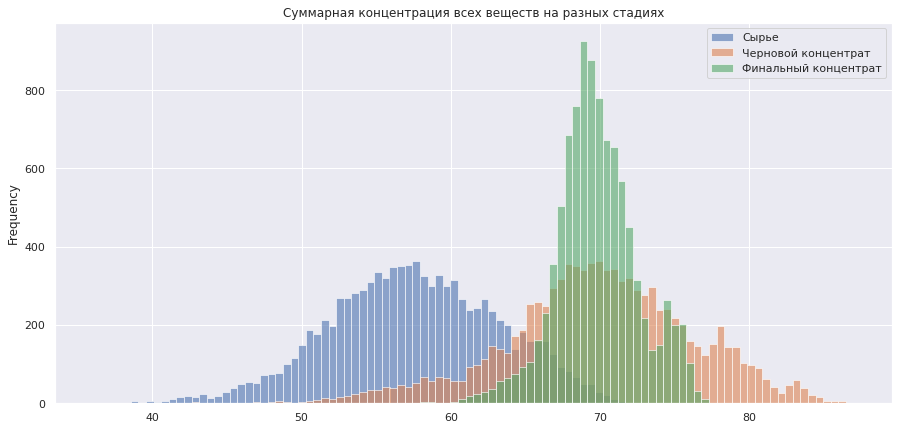

In [69]:
display_hist(agent_sum)

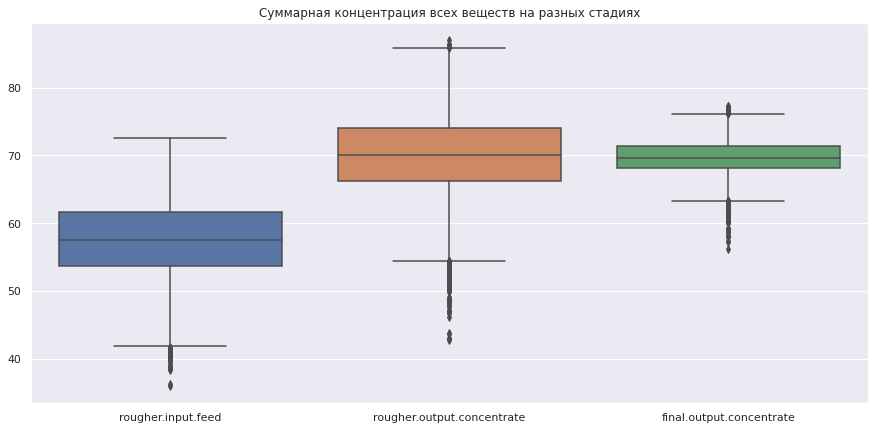

In [70]:
display_boxplot(agent_sum)

Стало гораздо лучше, но сколько данных мы потеряли?

In [71]:
100 * df_train.shape[0] / df_train_original.shape[0]

69.17803378330625

По сравнению с исходной выборкой после всех очисток потерян почти 31% данных. Все ради модели!

## Модель

### Формулы метрик качества

$$
\\sMAPE = \frac{1}{N}\sum_{i=1}^{N}*\frac{|y_{i}-\hat{y}|}{(|y_{i}|+|\hat{y}|)/2}*100\% 
$$

$$
\\final = 25\% * sMAPE(rougher) + 75\% * sMAPE(final)
$$

Определим формулы для вычисления метрик качества

In [72]:
def sMAPE(target, prediction):
    return 1 / len(target) * sum( abs(target - prediction) / ( (abs(target) + abs(prediction)) * 0.5) ) * 100

In [73]:
def sMAPE_final(rough, final):
    return 0.25 * rough + 0.75 * final

In [74]:
custom_score = make_scorer(sMAPE, greater_is_better=False)

### Подготовка данных для машинного обучения

Так как столбцы в тестовой и обучающей выборках различаются, необходимо сформировать новую обучающую выборку только с теми столбцами, которые есть в тестовой

In [75]:
df_train_full = df_train.copy()

df_train = df_train.drop(list(df_train.columns.difference(df_test.columns)), axis=1)

Итоговая метрика sMAPE зависит линейно от sMAPE после флотации и после очистки, значит, обучать модель можно на двух независимых выборках
Выделим в обучающей выборке признаки и целевые признаки

Сформируем списки столбцов для rougher и final выборок

In [76]:
rougher_columns = []
pattern = re.compile('rougher')

for column in list(df_test.columns):
    if re.match(pattern, column):
        rougher_columns.append(column)

final_columns = list(set(df_test.columns) - set(rougher_columns))

Скопируем из общей выборки в тестовую значения из целевых столбцов по индексу строк

In [77]:
test_index = list(df_test.index)

test_target_columns = pd.DataFrame()
test_target_columns = df_full.loc[test_index][['rougher.output.recovery', 'final.output.recovery']]

Разделим выборки

In [78]:
rougher_train_features = df_train[rougher_columns]
rougher_train_target = df_train_full['rougher.output.recovery']

final_train_features = df_train[final_columns]
final_train_target = df_train_full['final.output.recovery']

rougher_test_features = df_test[rougher_columns]
rougher_test_target = test_target_columns['rougher.output.recovery']

final_test_features = df_test[final_columns]
final_test_target = test_target_columns['final.output.recovery']

Проверим размеры сформированных выборок

In [79]:
print(rougher_train_features.shape, rougher_train_target.shape)

(9788, 22) (9788,)


In [80]:
print(final_train_features.shape, final_train_target.shape)

(9788, 30) (9788,)


In [81]:
print(rougher_test_features.shape, final_test_features.shape)

(5229, 22) (5229, 30)


Масштабируем признаки на обучающей и тестовой выборках с помощью метода StandardScaler

Функция для обучения Scaler на выборке

In [84]:
def fit_scaler(df):
    scaler = StandardScaler()
    scaler.fit(df)
    return scaler

Функция для применения обученного Scaler на выборке

In [85]:
def apply_scaler(df, scaler):
    return pd.DataFrame(scaler.transform(df))

Обучим Scaler на обеих обучающих выборках (rougher и final)

In [86]:
rougher_scaler = fit_scaler(rougher_train_features)
final_scaler = fit_scaler(final_train_features)

Применим обученный Scaler ко всем выборкам

In [87]:
rougher_train_features = apply_scaler(rougher_train_features, rougher_scaler)
rougher_test_features = apply_scaler(rougher_test_features, rougher_scaler)

In [88]:
final_train_features = apply_scaler(final_train_features, final_scaler)
final_test_features = apply_scaler(final_test_features, final_scaler)

### Обучение моделей

Создадим модели RandomForestRegressor и DecisionTreeRegressor

In [89]:
model_rf = RandomForestRegressor()
model_dt = DecisionTreeRegressor()

Зададим параметры для GridSearchCV

In [90]:
parameters_rf = {"n_estimators":[5,100], "max_depth":[1,10]}
parameters_dt = {"max_depth":[1,10]}

Проведем обучение моделей

In [91]:
def get_grid(model, parameters, custom_score, features, target):
    grid = GridSearchCV(model, parameters, custom_score)
    grid.fit(features, target)
    return grid

In [92]:
grid_rougher_rf = get_grid(model_rf, parameters_rf, custom_score, rougher_train_features, rougher_train_target)
grid_rougher_dt = get_grid(model_dt, parameters_dt, custom_score, rougher_train_features, rougher_train_target)

grid_final_rf = get_grid(model_rf, parameters_rf, custom_score, final_train_features, final_train_target)
grid_final_dt = get_grid(model_dt, parameters_dt, custom_score, final_train_features, final_train_target)

Выведем параметры обученных моделей

In [93]:
def display_grid(grid):
    print('Best score:', grid.best_score_, 
          '\nBest estimator:', grid.best_estimator_)

In [94]:
display_grid(grid_rougher_rf)

Best score: -5.942757268491076 
Best estimator: RandomForestRegressor(max_depth=10)


In [95]:
display_grid(grid_rougher_dt)

Best score: -6.6261820243879255 
Best estimator: DecisionTreeRegressor(max_depth=1)


In [96]:
display_grid(grid_final_rf)

Best score: -8.724345711055719 
Best estimator: RandomForestRegressor(max_depth=1, n_estimators=5)


In [97]:
display_grid(grid_final_dt)

Best score: -8.8954475131055 
Best estimator: DecisionTreeRegressor(max_depth=1)


Очевидно, лучшие параметры показывает RandomForestRegressor

Рассчитаем итоговую sMAPE

In [98]:
sMAPE_final(grid_rougher_rf.best_score_, grid_final_rf.best_score_)

-8.028948600414559

In [99]:
sMAPE_final(grid_rougher_dt.best_score_, grid_final_dt.best_score_)

-8.328131140926105

Опять же, у RandomForestRegressor результат лучше

### Предсказание на тестовой выборке

In [100]:
rougher_test_predictions = grid_rougher_rf.predict(rougher_test_features)

In [101]:
final_test_predictions = grid_final_rf.predict(final_test_features)

In [102]:
sMAPE_final(sMAPE(rougher_test_target, rougher_test_predictions),
            sMAPE(final_test_target, final_test_predictions))

8.31330008363726

* Итоговая модель была построена на алгоритме RandomForestRegressor
* Ошибка модели на обучающей выборке 11.244732296697391
* Ошибка модели на тестовой выборке 8.64075214819033